## Netflix Exploratory Data Analysis

Data Source: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

### Import Neccesary Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats
import os
import math
import ast
import random

### Read in Data

In [6]:
df = pd.read_csv(r"C:\Users\91741\Downloads\titles.csv")

In [7]:
def bin_years_to_decade(year):
    return int(str(year)[0:-1]+"0")

df['decade'] = df['release_year'].map(bin_years_to_decade)

df.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   

   tmdb_popularity  tmdb_score  decade  
0            0.600         NaN    1940  
1           40.965       8.179    1970  
2           10.010       7.300    1970  
3           15.461       7.811    1970  
4           20.398       7.600    1960

In [8]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'decade'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
 15  decade               

In [10]:
df.describe()

release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5850.000000  5850.000000  2106.000000  5368.000000  5.352000e+03   
mean    2016.417094    76.888889     2.162868     6.510861  2.343938e+04   
std        6.937726    39.002509     2.689041     1.163826  9.582047e+04   
min     1945.000000     0.000000     1.000000     1.500000  5.000000e+00   
25%     2016.000000    44.000000     1.000000     5.800000  5.167500e+02   
50%     2018.000000    83.000000     1.000000     6.600000  2.233500e+03   
75%     2020.000000   104.000000     2.000000     7.300000  9.494000e+03   
max     2022.000000   240.000000    42.000000     9.600000  2.294231e+06   

       tmdb_popularity   tmdb_score       decade  
count      5759.000000  5539.000000  5850.000000  
mean         22.637925     6.829175  2011.805128  
std          81.680263     1.170391     8.080822  
min           0.009442     0.500000  1940.000000  
25%           2.728500     6.100000  2010.000000  
50%           6.821000     6.900000  2010.000000  
75%          16.590000     7.537500  2020.000000  
max        2274.044000    10.000000  2020.000000

In [11]:
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    if len(arr) == 0:
        return np.nan
    elif len(arr) == 1:
        return arr[0]
    else:
        return random.choice(arr)
    
df["production_countries"] = df["production_countries"].apply(repair_array_bound_categories)
df["genres"] = df["genres"].apply(repair_array_bound_categories)

In [12]:
def fig_size():
    fig = plt.figure()
    fig.set_figwidth(15)
    fig.set_figheight(10)
    font = {'family' : 'normal','size' : 14}

### Movie Count vs TV Show Count on Netflix

<Figure size 1500x1000 with 0 Axes>

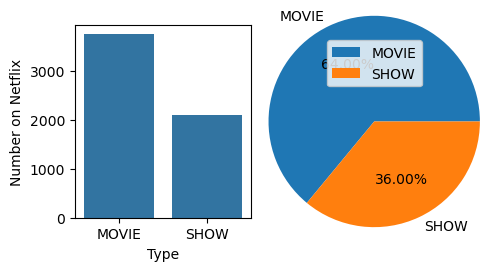

In [14]:
types = df.groupby('type').size().reset_index().rename(columns = {0:'counts'})

fig_size()
langs= types.type
fig, axes = plt.subplots(1,2, figsize=(5,2.5))
a1=sns.barplot(x = types.type, y = types.counts, ax=axes[0])
a1.set(xlabel='Type', ylabel='Number on Netflix')
plt.pie(types.counts,autopct='%1.2f%%',labels = langs,radius=1.5,labeldistance=1.1 , rotatelabels=False)
plt.legend()
plt.show()

### Genres on Netflix

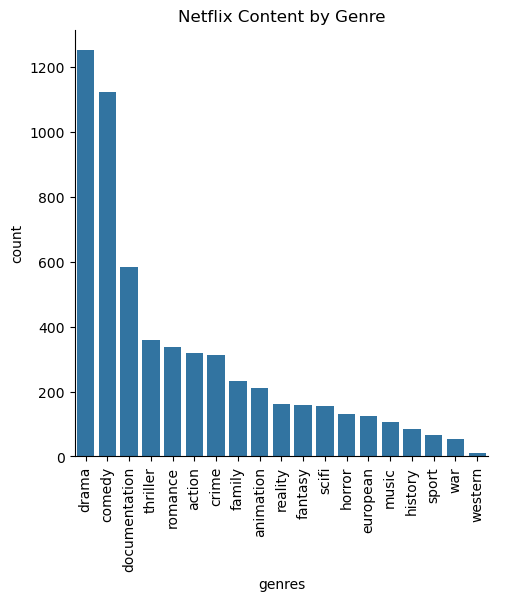

In [16]:
sns.catplot(x='genres', kind="count", data=df, order = df['genres'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Netflix Content by Genre')
plt.show()

### Age Certifications on Netflix

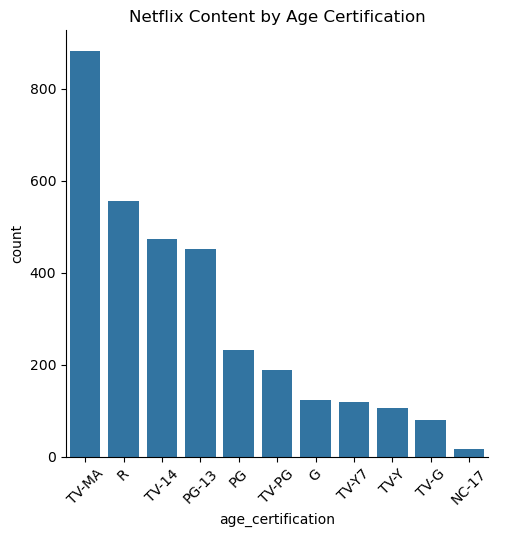

In [18]:
sns.catplot(x='age_certification', kind="count", data=df, order = df['age_certification'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Netflix Content by Age Certification')
plt.show()

### Genre Count by Age Certification

<Axes: xlabel='age_certification', ylabel='count'>

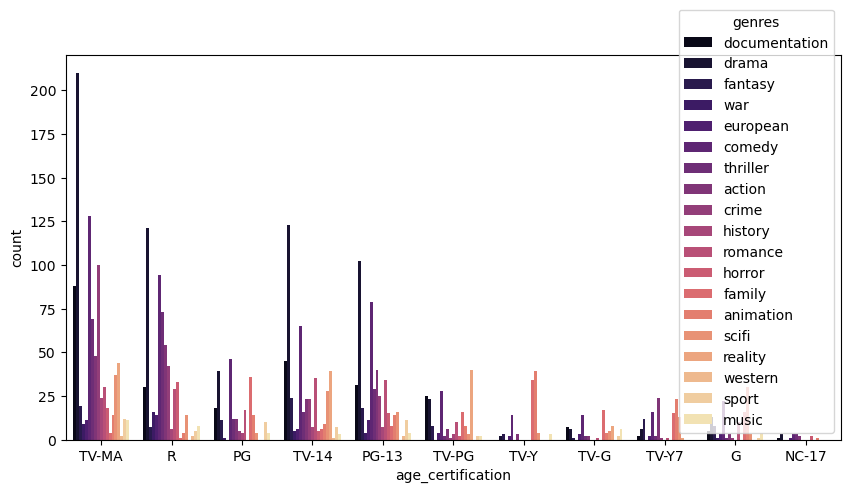

In [20]:
plt.figure(figsize=(10,5 ), dpi=100)
sns.countplot(data=df, x="age_certification", hue="genres",palette = 'magma')

### Netflix Content Release Dates

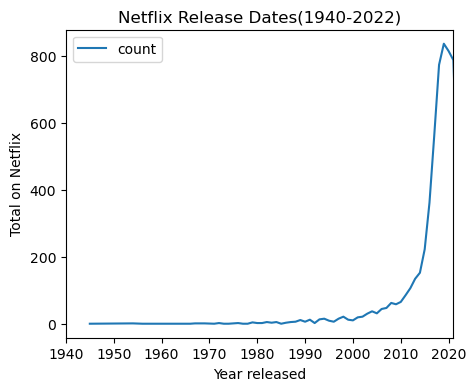

In [22]:
release_year_count= df.release_year.value_counts()
release_year_count = pd.DataFrame(release_year_count)

plt.figure(figsize=(5, 4))
sns.lineplot(data= release_year_count)
plt.title('Netflix Release Dates(1940-2022)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total on Netflix')
plt.show()

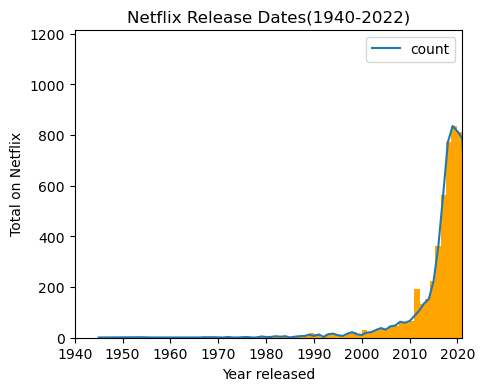

In [23]:
plt.figure(figsize=(5, 4))
plt.hist(df.release_year,bins =70,color='orange' )
plt.title('Netflix Release Dates(1940-2022)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total on Netflix')
sns.lineplot(data= release_year_count)
plt.show()

### Netflix Content Production Countries

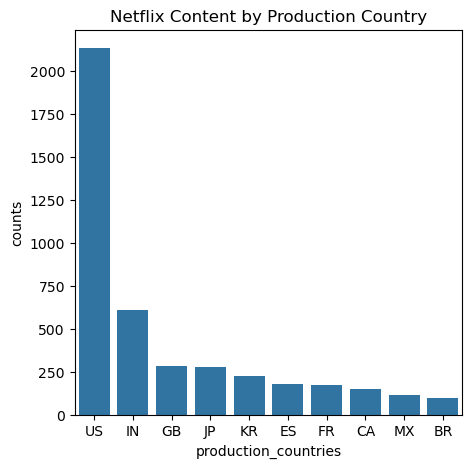

In [25]:
countries = df.groupby('production_countries').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'})

plt.figure(figsize=(5, 5))
sns.barplot(x = countries.production_countries[:10],y = countries.counts[:10]);
plt.title('Netflix Content by Production Country')
plt.show()

### IMDB vs TMDB Score

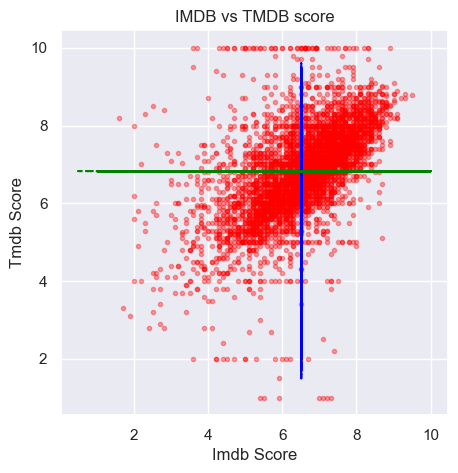

In [111]:
plt.figure(figsize =(5,5))

x_line =[np.mean(df.imdb_score)]*len(df.tmdb_score)     
y_line =[np.mean(df.tmdb_score)]*len(df.imdb_score)
plt.plot(x_line,df.imdb_score, label='Mean', linestyle='--',c ="blue")
plt.plot(df.tmdb_score,y_line, label='Mean', linestyle='--',c ="green")

plt.xlabel("Imdb Score")
plt.ylabel("Tmdb Score")
plt.scatter(x=df.imdb_score, y=df.tmdb_score,c ="red",alpha = 0.35,marker =".")


plt.title("IMDB vs TMDB score")

plt.show()

### IMDB Score by Year Released

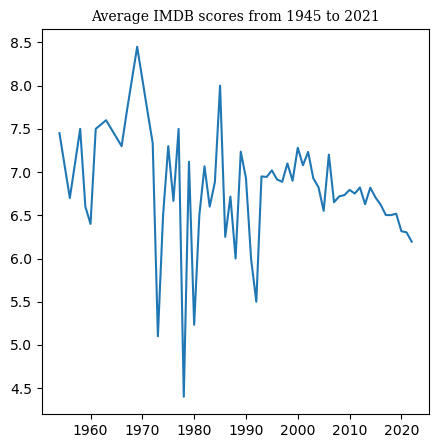

In [29]:
df = df.sort_values("release_year")
imdb_year_df=df[['release_year','imdb_score']]
imdb_year_df = imdb_year_df.groupby('release_year')[["imdb_score"]].mean()

font = {'family': 'serif','color':  'black','weight': 'normal','size': 10 }

plt.figure(figsize = (5,5))
plt.title("Average IMDB scores from 1945 to 2021",fontdict=font)
plt.plot(imdb_year_df)

### Runtime vs Decade and Age Certification

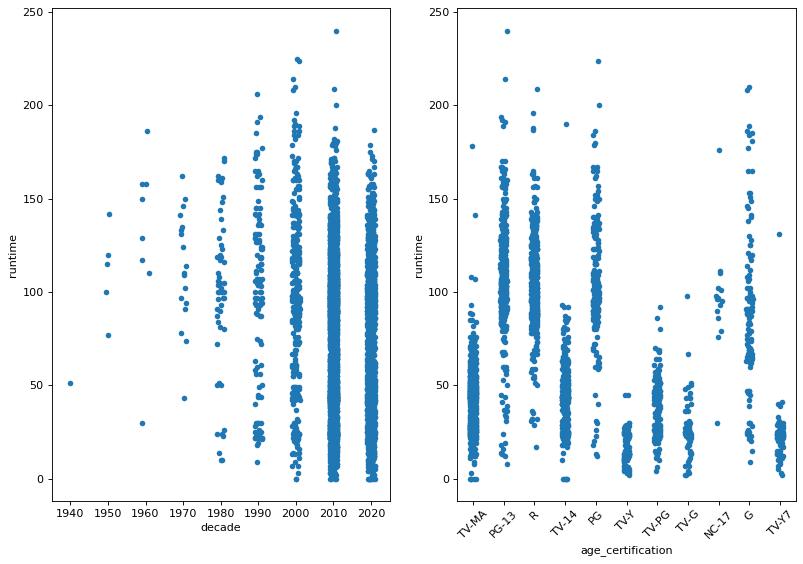

In [31]:
fig, ax = plt.subplots(1,2, figsize=(12,8), dpi= 80)    
a1=sns.stripplot(x=df.decade, y=df.runtime, ax=ax[0])
a2=sns.stripplot(x=df.age_certification, y=df.runtime, ax=ax[1])
plt.xticks(rotation=45)
plt.show()

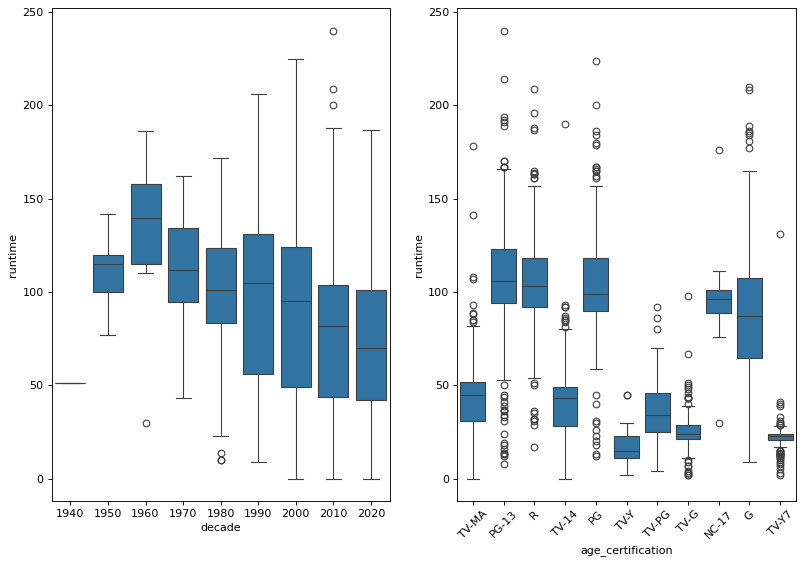

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,8), dpi= 80)    
a1=sns.boxplot(x=df.decade, y=df.runtime, ax=ax[0])
a2=sns.boxplot(x=df.age_certification, y=df.runtime, ax=ax[1])
plt.xticks(rotation=45)
plt.show()

### Correlation Heat Map for Netflix

<Axes: >

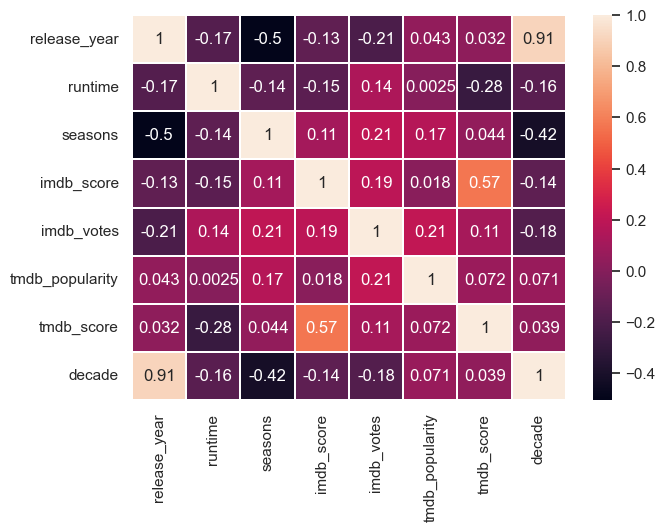

In [34]:
df_numeric = df.select_dtypes(include=[np.number])

# Plot heatmap of the correlation matrix
sns.set(rc={'figure.figsize': (7, 5)})
sns.heatmap(df_numeric.corr(), annot=True, linewidths=0.03)

### Pairplot for Netflix Data

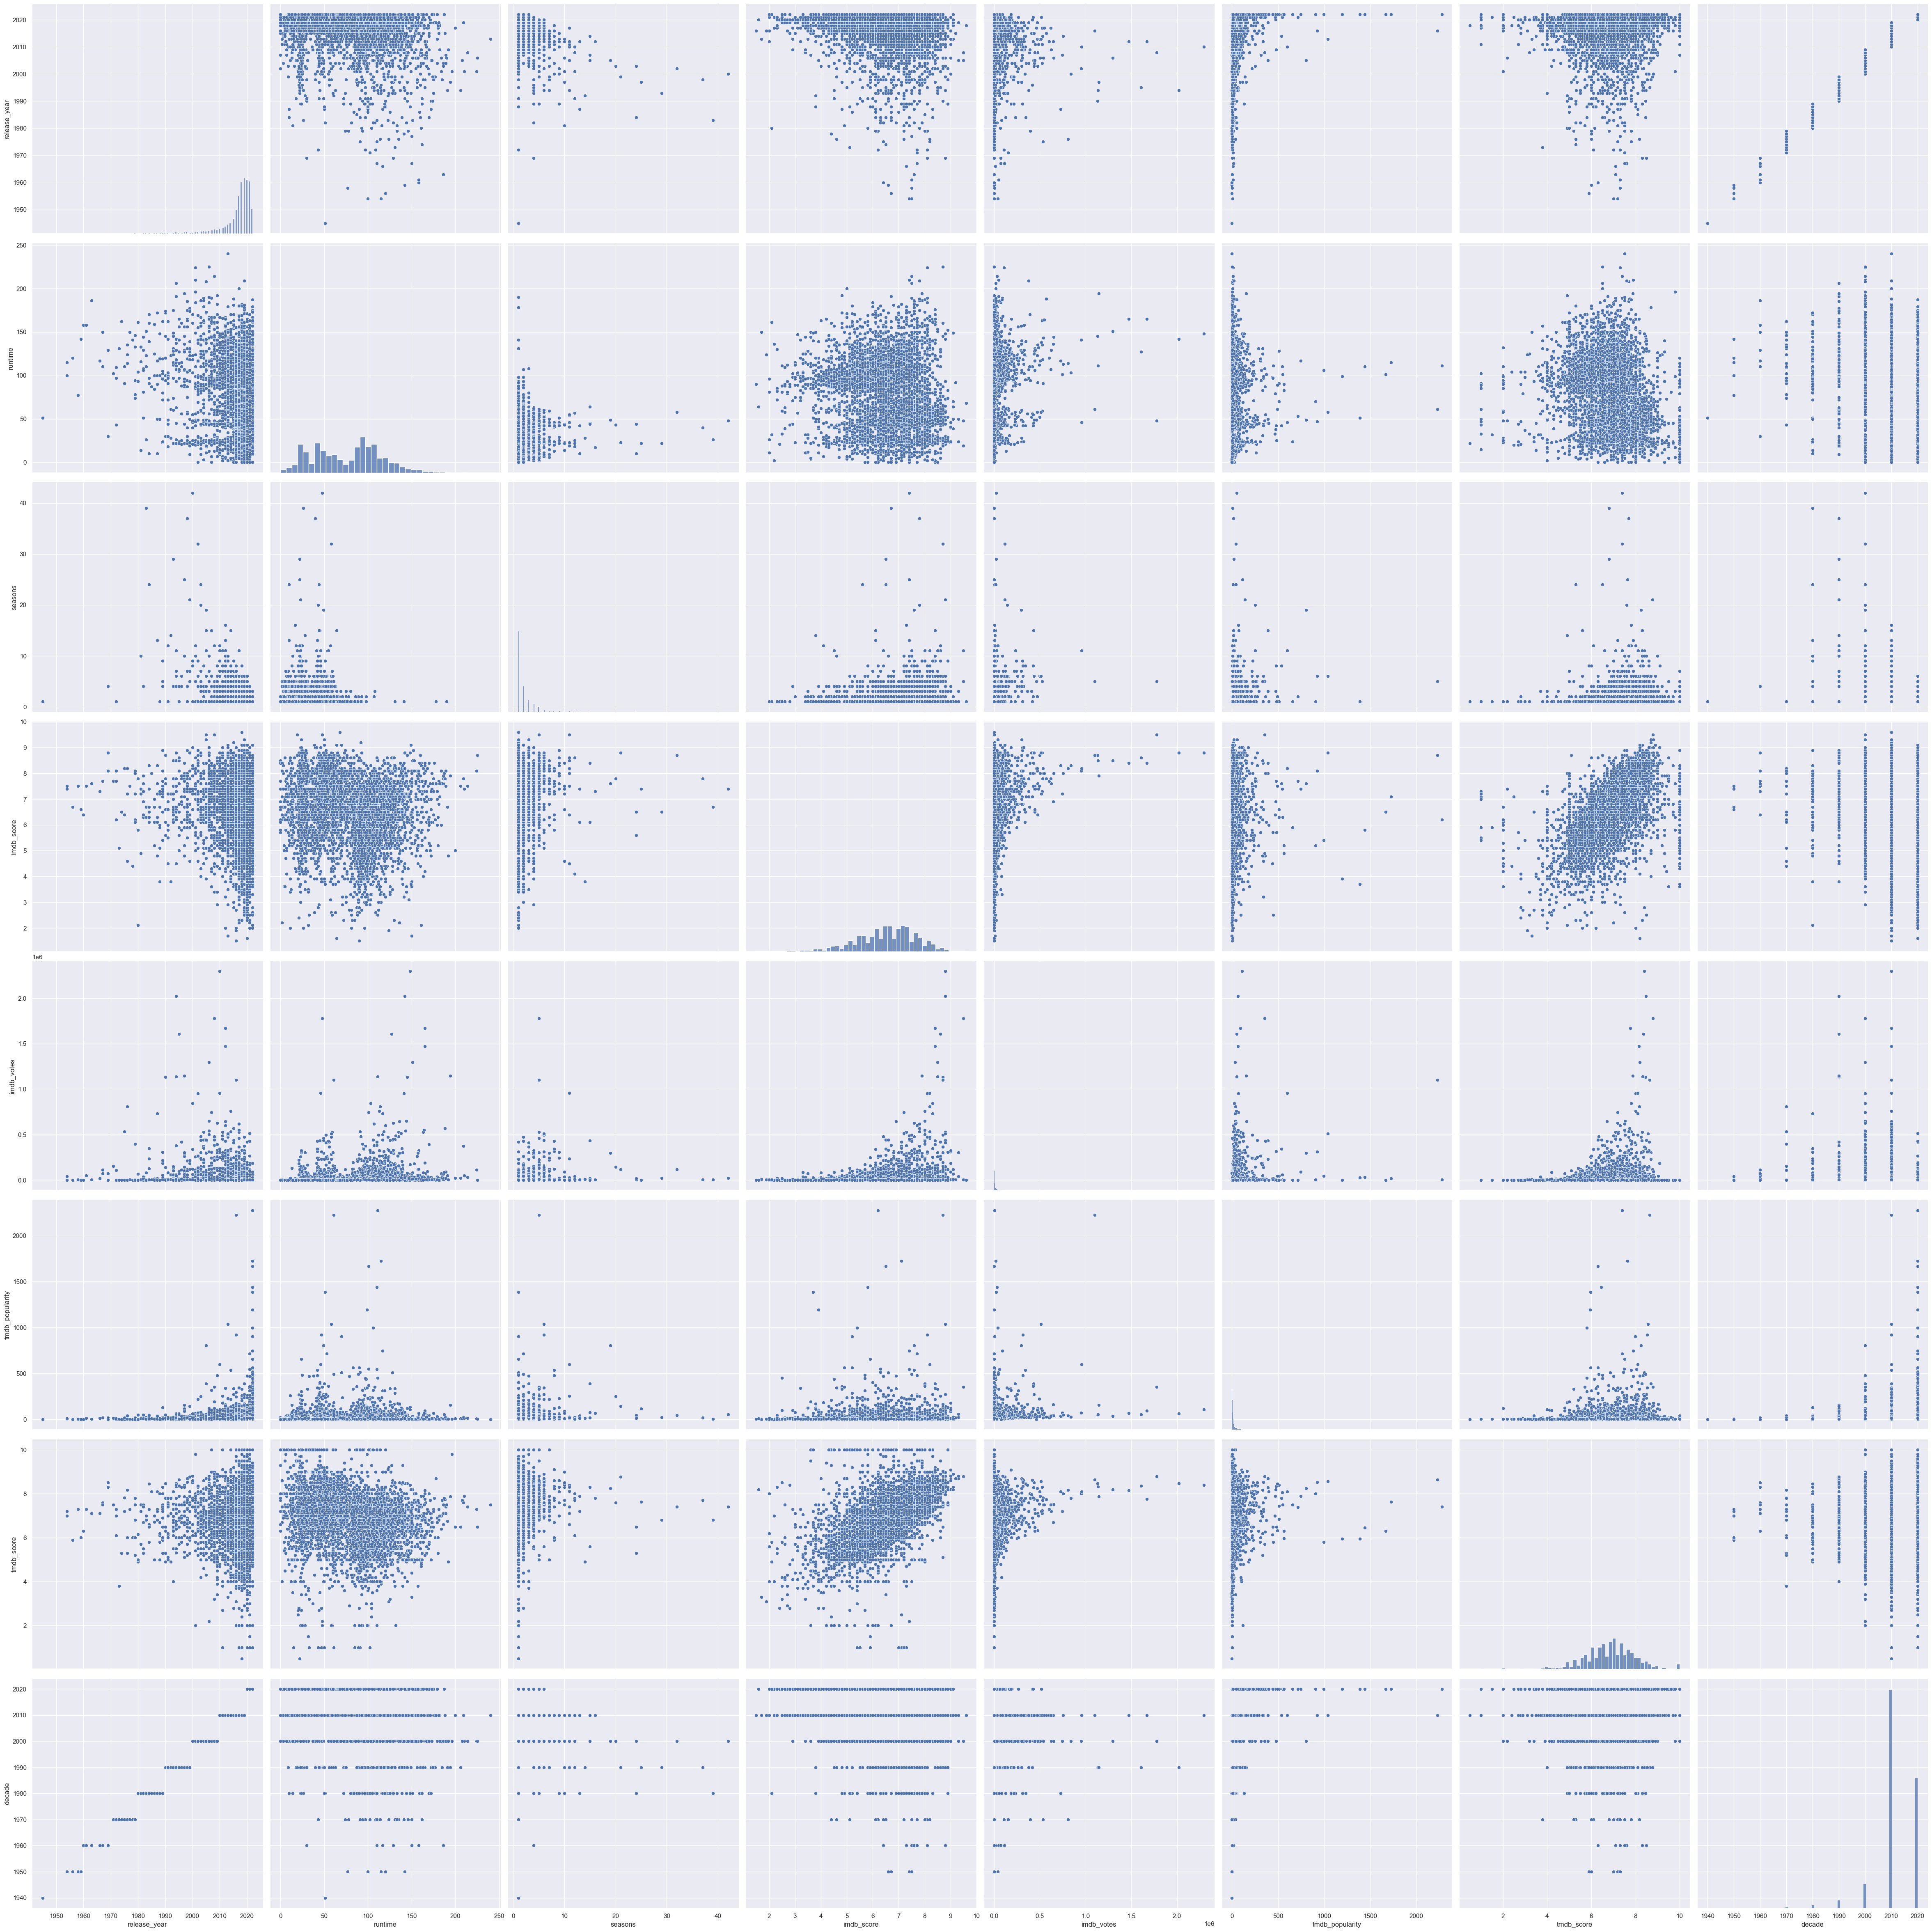

In [36]:
sns.pairplot(df,height=6 , aspect=1)


In [37]:
df1 = pd.read_csv(r"C:\Users\91741\Downloads\credits.csv")

In [38]:
df1.head()

person_id       id             name                character   role
0       3748  tm84618   Robert De Niro            Travis Bickle  ACTOR
1      14658  tm84618     Jodie Foster            Iris Steensma  ACTOR
2       7064  tm84618    Albert Brooks                      Tom  ACTOR
3       3739  tm84618    Harvey Keitel  Matthew 'Sport' Higgins  ACTOR
4      48933  tm84618  Cybill Shepherd                    Betsy  ACTOR

In [39]:
df1

person_id         id                name                character  \
0           3748    tm84618      Robert De Niro            Travis Bickle   
1          14658    tm84618        Jodie Foster            Iris Steensma   
2           7064    tm84618       Albert Brooks                      Tom   
3           3739    tm84618       Harvey Keitel  Matthew 'Sport' Higgins   
4          48933    tm84618     Cybill Shepherd                    Betsy   
...          ...        ...                 ...                      ...   
77796     736339  tm1059008    Adelaida Buscato                María Paz   
77797     399499  tm1059008  Luz Stella Luengas             Karen Bayona   
77798     373198  tm1059008         Inés Prieto                    Fanny   
77799     378132  tm1059008        Isabel Gaona                   Cacica   
77800    1950416  tm1059008      Julian Gaviria                      NaN   

           role  
0         ACTOR  
1         ACTOR  
2         ACTOR  
3         ACTOR  
4         ACTOR  
...         ...  
77796     ACTOR  
77797     ACTOR  
77798     ACTOR  
77799     ACTOR  
77800  DIRECTOR  

[77801 rows x 5 columns]

In [40]:
df1["person_id"].min()

7

In [41]:
df1["person_id"].max()


2462818

In [42]:
df1["role"].nunique()

2

In [43]:
df1.loc[df1["id"] =="tm84618"]

person_id       id                name  \
0        3748  tm84618      Robert De Niro   
1       14658  tm84618        Jodie Foster   
2        7064  tm84618       Albert Brooks   
3        3739  tm84618       Harvey Keitel   
4       48933  tm84618     Cybill Shepherd   
5       32267  tm84618         Peter Boyle   
6      519612  tm84618      Leonard Harris   
7       29068  tm84618      Diahnne Abbott   
8      519613  tm84618         Gino Ardito   
9        3308  tm84618     Martin Scorsese   
10      43791  tm84618       Murray Moston   
11     519614  tm84618       Richard Higgs   
12     519615  tm84618         Bill Minkin   
13      82426  tm84618          Bob Maroff   
14      20935  tm84618         Victor Argo   
15       7753  tm84618         Joe Spinell   
16      43279  tm84618  Robinson Frank Adu   
17     519616  tm84618      Brenda Dickson   
18       8424  tm84618      Norman Matlock   
19      20447  tm84618       Harry Northup   
20     519618  tm84618     Harlan Cary Poe   
21      49567  tm84618       Steven Prince   
22      15551  tm84618        Peter Savage   
23     475303  tm84618    Nicholas Shields   
24      43540  tm84618  Ralph S. Singleton   
25     466061  tm84618         Annie Gagen   
26     212023  tm84618        Carson Grant   
27       5367  tm84618      Mary-Pat Green   
28      17421  tm84618        Debbi Morgan   
29      38141  tm84618          Don Stroud   
30     811415  tm84618   Copper Cunningham   
31    1141852  tm84618         Garth Avery   
32    1662310  tm84618           Nat Grant   
33    1393387  tm84618      Billie Perkins   
34       9446  tm84618  Catherine Scorsese   
35       9451  tm84618    Charles Scorsese   
36       3308  tm84618     Martin Scorsese   

                                        character      role  
0                                   Travis Bickle     ACTOR  
1                                   Iris Steensma     ACTOR  
2                                             Tom     ACTOR  
3                         Matthew 'Sport' Higgins     ACTOR  
4                                           Betsy     ACTOR  
5                                          Wizard     ACTOR  
6                       Senator Charles Palantine     ACTOR  
7                                 Concession Girl     ACTOR  
8                              Policeman at Rally     ACTOR  
9                   Passenger Watching Silhouette     ACTOR  
10                              Iris' Time Keeper     ACTOR  
11                           Secret Service Agent     ACTOR  
12                   Tom's Assistant (uncredited)     ACTOR  
13                           Mafioso (uncredited)     ACTOR  
14                      Melio, Delicatessen Owner     ACTOR  
15                              Personell Officer     ACTOR  
16                   Angry Black Man (uncredited)     ACTOR  
17                  Soap Opera Woman (uncredited)     ACTOR  
18                                      Charlie T     ACTOR  
19                                       Doughboy     ACTOR  
20                   Campaign Worker (uncredited)     ACTOR  
21                            Andy - Gun Salesman     ACTOR  
22                                       The John     ACTOR  
23                  Palantine's Aide (uncredited)     ACTOR  
24                  T.V. Interviewer (uncredited)     ACTOR  
25                   Campaign Worker (uncredited)     ACTOR  
26                 Political rallier (uncredited)     ACTOR  
27                     Campaign Aide (uncredited)     ACTOR  
28           Girl at Columbus Circle (uncredited)     ACTOR  
29                         Policeman (uncredited)     ACTOR  
30                                  Hooker in Cab     ACTOR  
31                                   Iris' friend     ACTOR  
32                                  Stick-aup Man     ACTOR  
33                      Iris' Friend (uncredited)     ACTOR  
34  Iris' Mother (newspaper article) (uncredited)     ACTOR  
35  Iris' Father (newsp

In [44]:
df.head()

id                                title   type  \
0   ts300399  Five Came Back: The Reference Films   SHOW   
22   tm19608                      The Blazing Sun  MOVIE   
13   tm16479                      White Christmas  MOVIE   
23  tm204541                          Dark Waters  MOVIE   
14  tm135083                        Cairo Station  MOVIE   

                                          description  release_year  \
0   This collection includes 12 World War II-era p...          1945   
22  A rich landlord floods and destroys a village ...          1954   
13  Two talented song-and-dance men team up after ...          1954   
23  Ragab, a poor sailor, returns home to Alexandr...          1956   
14  Qinawi, a physically challenged peddler who ma...          1958   

   age_certification  runtime         genres production_countries  seasons  \
0              TV-MA       51  documentation                   US      1.0   
22               NaN      100          crime                   EG      NaN   
13               NaN      115         comedy                   US      NaN   
23               NaN      120        romance                   EG      NaN   
14               NaN       77          crime                   EG      NaN   

      imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  decade  
0         NaN         NaN         NaN            0.600         NaN    1940  
22  tt0047500         7.4      1219.0            2.184         7.0    1950  
13  tt0047673         7.5     42488.0            8.915         7.2    1950  
23  tt0049761         6.7       610.0            0.849         5.9    1950  
14  tt0051390         7.5      4471.0            5.546         7.3    1950

In [45]:
combined=pd.concat([df,df1],ignore_index=True)
print(combined)

              id                                title   type  \
0       ts300399  Five Came Back: The Reference Films   SHOW   
1        tm19608                      The Blazing Sun  MOVIE   
2        tm16479                      White Christmas  MOVIE   
3       tm204541                          Dark Waters  MOVIE   
4       tm135083                        Cairo Station  MOVIE   
...          ...                                  ...    ...   
83646  tm1059008                                  NaN    NaN   
83647  tm1059008                                  NaN    NaN   
83648  tm1059008                                  NaN    NaN   
83649  tm1059008                                  NaN    NaN   
83650  tm1059008                                  NaN    NaN   

                                             description  release_year  \
0      This collection includes 12 World War II-era p...        1945.0   
1      A rich landlord floods and destroys a village ...        1954.0   
2      Tw

In [46]:
combined

id                                title   type  \
0       ts300399  Five Came Back: The Reference Films   SHOW   
1        tm19608                      The Blazing Sun  MOVIE   
2        tm16479                      White Christmas  MOVIE   
3       tm204541                          Dark Waters  MOVIE   
4       tm135083                        Cairo Station  MOVIE   
...          ...                                  ...    ...   
83646  tm1059008                                  NaN    NaN   
83647  tm1059008                                  NaN    NaN   
83648  tm1059008                                  NaN    NaN   
83649  tm1059008                                  NaN    NaN   
83650  tm1059008                                  NaN    NaN   

                                             description  release_year  \
0      This collection includes 12 World War II-era p...        1945.0   
1      A rich landlord floods and destroys a village ...        1954.0   
2      Two talented song-and-dance men team up after ...        1954.0   
3      Ragab, a poor sailor, returns home to Alexandr...        1956.0   
4      Qinawi, a physically challenged peddler who ma...        1958.0   
...                                                  ...           ...   
83646                                                NaN           NaN   
83647                                                NaN           NaN   
83648                                                NaN           NaN   
83649                                                NaN           NaN   
83650                                                NaN           NaN   

      age_certification  runtime         genres production_countries  seasons  \
0                 TV-MA     51.0  documentation                   US      1.0   
1                   NaN    100.0          crime                   EG      NaN   
2                   NaN    115.0         comedy                   US      NaN   
3                   NaN    120.0        romance                   EG      NaN   
4                   NaN     77.0          crime                   EG      NaN   
...                 ...      ...            ...                  ...      ...   
83646               NaN      NaN            NaN                  NaN      NaN   
83647               NaN      NaN            NaN                  NaN      NaN   
83648               NaN      NaN            NaN                  NaN      NaN   
83649               NaN      NaN            NaN                  NaN      NaN   
83650               NaN      NaN            NaN                  NaN      NaN   

         imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  decade  \
0            NaN         NaN         NaN            0.600         NaN  1940.0   
1      tt0047500         7.4      1219.0            2.184         7.0  1950.0   
2      tt0047673         7.5     42488.0            8.915         7.2  1950.0   
3      tt0049761         6.7       610.0            0.849         5.9  1950.0   
4      tt0051390         7.5      4471.0            5.546         7.3  1950.0   
...          ...         ...         ...              ...         ...     ...   
83646        NaN         NaN         NaN              NaN         NaN     NaN   
83647        NaN         NaN         NaN              NaN         NaN     NaN   
83648        NaN         NaN         NaN              NaN         NaN     NaN   
83649        NaN         NaN         NaN              NaN         NaN     NaN   
83650        NaN         NaN         NaN              NaN         NaN     NaN   

       person_id                name     character      role  
0            NaN                 NaN           NaN       NaN  
1            NaN                 NaN           NaN       NaN  
2            NaN                 NaN           NaN       NaN  
3            NaN                 NaN           NaN       NaN  
4            NaN                 NaN           NaN       NaN  
...          ...                

In [47]:
grouped=combined.groupby("id")['name'].agg(lambda x:', '.join(x.dropna() if isinstance(x,pd.Series)else x)).reset_index()
grouped

id                                               name
0     tm1000037  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...
1     tm1000147  Guy Pearce, Matilda Anna Ingrid Lutz, Travis F...
2      tm100015  Idris Elba, Paul Walker, Matt Dillon, Michael ...
3     tm1000166  Glenn Fredly, Marcello Tahitoe, Andien Aisyah,...
4     tm1000185  Adrianna Chlebicka, Mateusz Banasiuk, Mirosław...
...         ...                                                ...
5845    ts98316                                          John Hurt
5846    ts98340                                                   
5847    ts98353                                                   
5848      ts987  David Jason, Terry Scott, Edward Kelsey, Brian...
5849    ts99814                                                   

[5850 rows x 2 columns]

In [48]:
merged_df = pd.merge(df, grouped, on='id', suffixes=('', '_grouped'))
merged_df

id                                title   type  \
0      ts300399  Five Came Back: The Reference Films   SHOW   
1       tm19608                      The Blazing Sun  MOVIE   
2       tm16479                      White Christmas  MOVIE   
3      tm204541                          Dark Waters  MOVIE   
4      tm135083                        Cairo Station  MOVIE   
...         ...                                  ...    ...   
5845  tm1120902                        The Privilege  MOVIE   
5846  tm1196455  The Photographer: Murder in Pinamar  MOVIE   
5847   ts330347                      Cracow Monsters   SHOW   
5848  tm1180610                     The Wrath of God  MOVIE   
5849   ts304310                   No Regrets In Life   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A rich landlord floods and destroys a village ...          1954   
2     Two talented song-and-dance men team up after ...          1954   
3     Ragab, a poor sailor, returns home to Alexandr...          1956   
4     Qinawi, a physically challenged peddler who ma...          1958   
...                                                 ...           ...   
5845  A wealthy teen and his friends attending an el...          2022   
5846  The murder of photographer José Luis Cabezas i...          2022   
5847  A young woman haunted by her past joins a myst...          2022   
5848  Convinced the tragic deaths of her loved ones ...          2022   
5849  Two college sweethearts' paths cross again eig...          2022   

     age_certification  runtime         genres production_countries  seasons  \
0                TV-MA       51  documentation                   US      1.0   
1                  NaN      100          crime                   EG      NaN   
2                  NaN      115         comedy                   US      NaN   
3                  NaN      120        romance                   EG      NaN   
4                  NaN       77          crime                   EG      NaN   
...                ...      ...            ...                  ...      ...   
5845               NaN      107          scifi                   DE      NaN   
5846               NaN      105  documentation                   AR      NaN   
5847             TV-MA       52          drama                   PL      1.0   
5848               NaN       97          drama                   AR      NaN   
5849               NaN       71        romance                   TW      1.0   

         imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  decade  \
0            NaN         NaN         NaN            0.600         NaN    1940   
1      tt0047500         7.4      1219.0            2.184       7.000    1950   
2      tt0047673         7.5     42488.0            8.915       7.200    1950   
3      tt0049761         6.7       610.0            0.849       5.900    1950   
4      tt0051390         7.5      4471.0            5.546       7.300    1950   
...          ...         ...         ...              ...         ...     ...   
5845  tt14637290         4.6      4293.0          101.240       5.000    2020   
5846  tt19731714         6.7       494.0           49.939       7.200    2020   
5847  tt15096836         5.5      1694.0          119.993       6.900    2020   
5848  tt15189534         5.7      2800.0          445.767       6.495    2020   
5849  tt20859930         NaN         NaN           11.617         NaN    2020   

                                                   name  
0                                                        
1     Faten Hamamah, Omar Sharif, Zaki Rostom, Farid...  
2     Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...  
3     Omar Sharif, Faten Hamamah, Ahmed Ramzy, Tewfi...  
4     Farid Shawqi, Hind Rostom, Youssef Chahine, Ha...  
...                                                 ...  
5845  Max Schimmelpfennig, Lea van Acke

In [91]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5791 non-null   object 
 8   production_countries  5621 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
 15  decade               

In [49]:
from mpl_toolkits.mplot3d import Axes3D

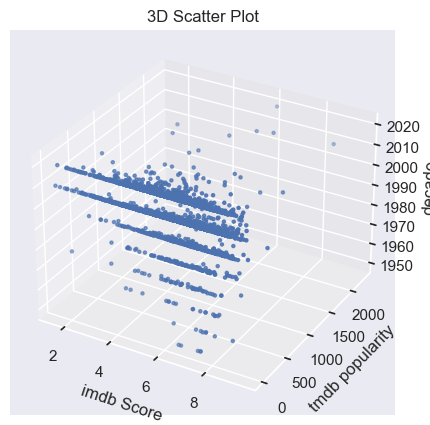

In [89]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x = df['imdb_score']
y= df['tmdb_popularity']
z = df['decade']

ax.scatter(x,y,z, c='b',marker=".")

ax.set_xlabel('imdb Score')
ax.set_ylabel('tmdb popularity')
ax.set_zlabel('decade')
ax.set_title('3D Scatter Plot')

plt.show()


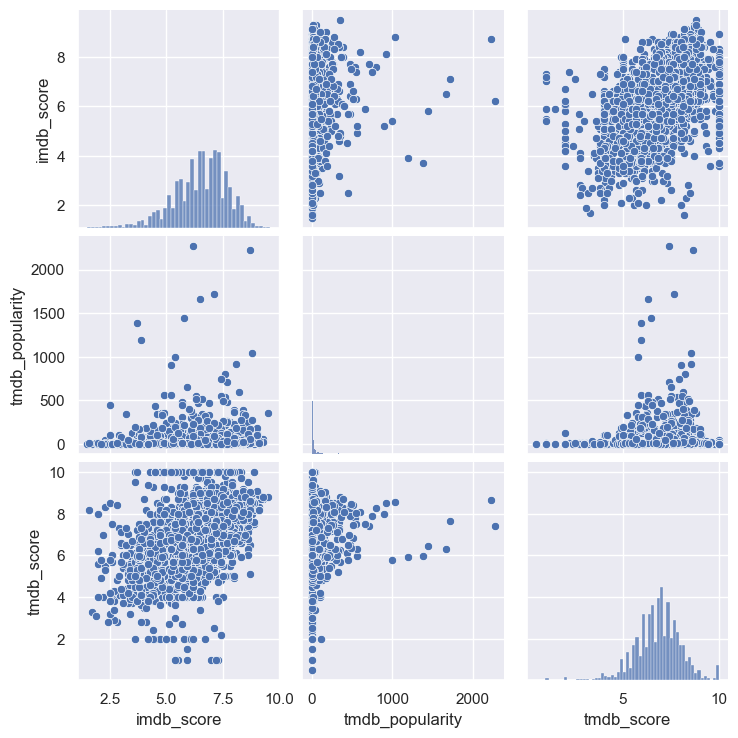

In [51]:
cols = ['imdb_score', 'tmdb_popularity', 'tmdb_score']

sns.pairplot(df[cols])


plt.show()

In [52]:
print(merged_df.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'decade', 'name'],
      dtype='object')


In [54]:
merged_df['genres'].unique()

array(['documentation', 'crime', 'comedy', 'romance', 'drama', 'thriller',
       'action', 'war', 'european', 'fantasy', 'history', 'animation',
       'family', 'scifi', 'horror', 'reality', 'sport', 'western',
       'music', nan], dtype=object)

In [56]:
print(merged_df['age_certification'].unique())

['TV-MA' nan 'PG-13' 'R' 'TV-14' 'PG' 'TV-Y' 'TV-PG' 'TV-G' 'NC-17' 'G'
 'TV-Y7']


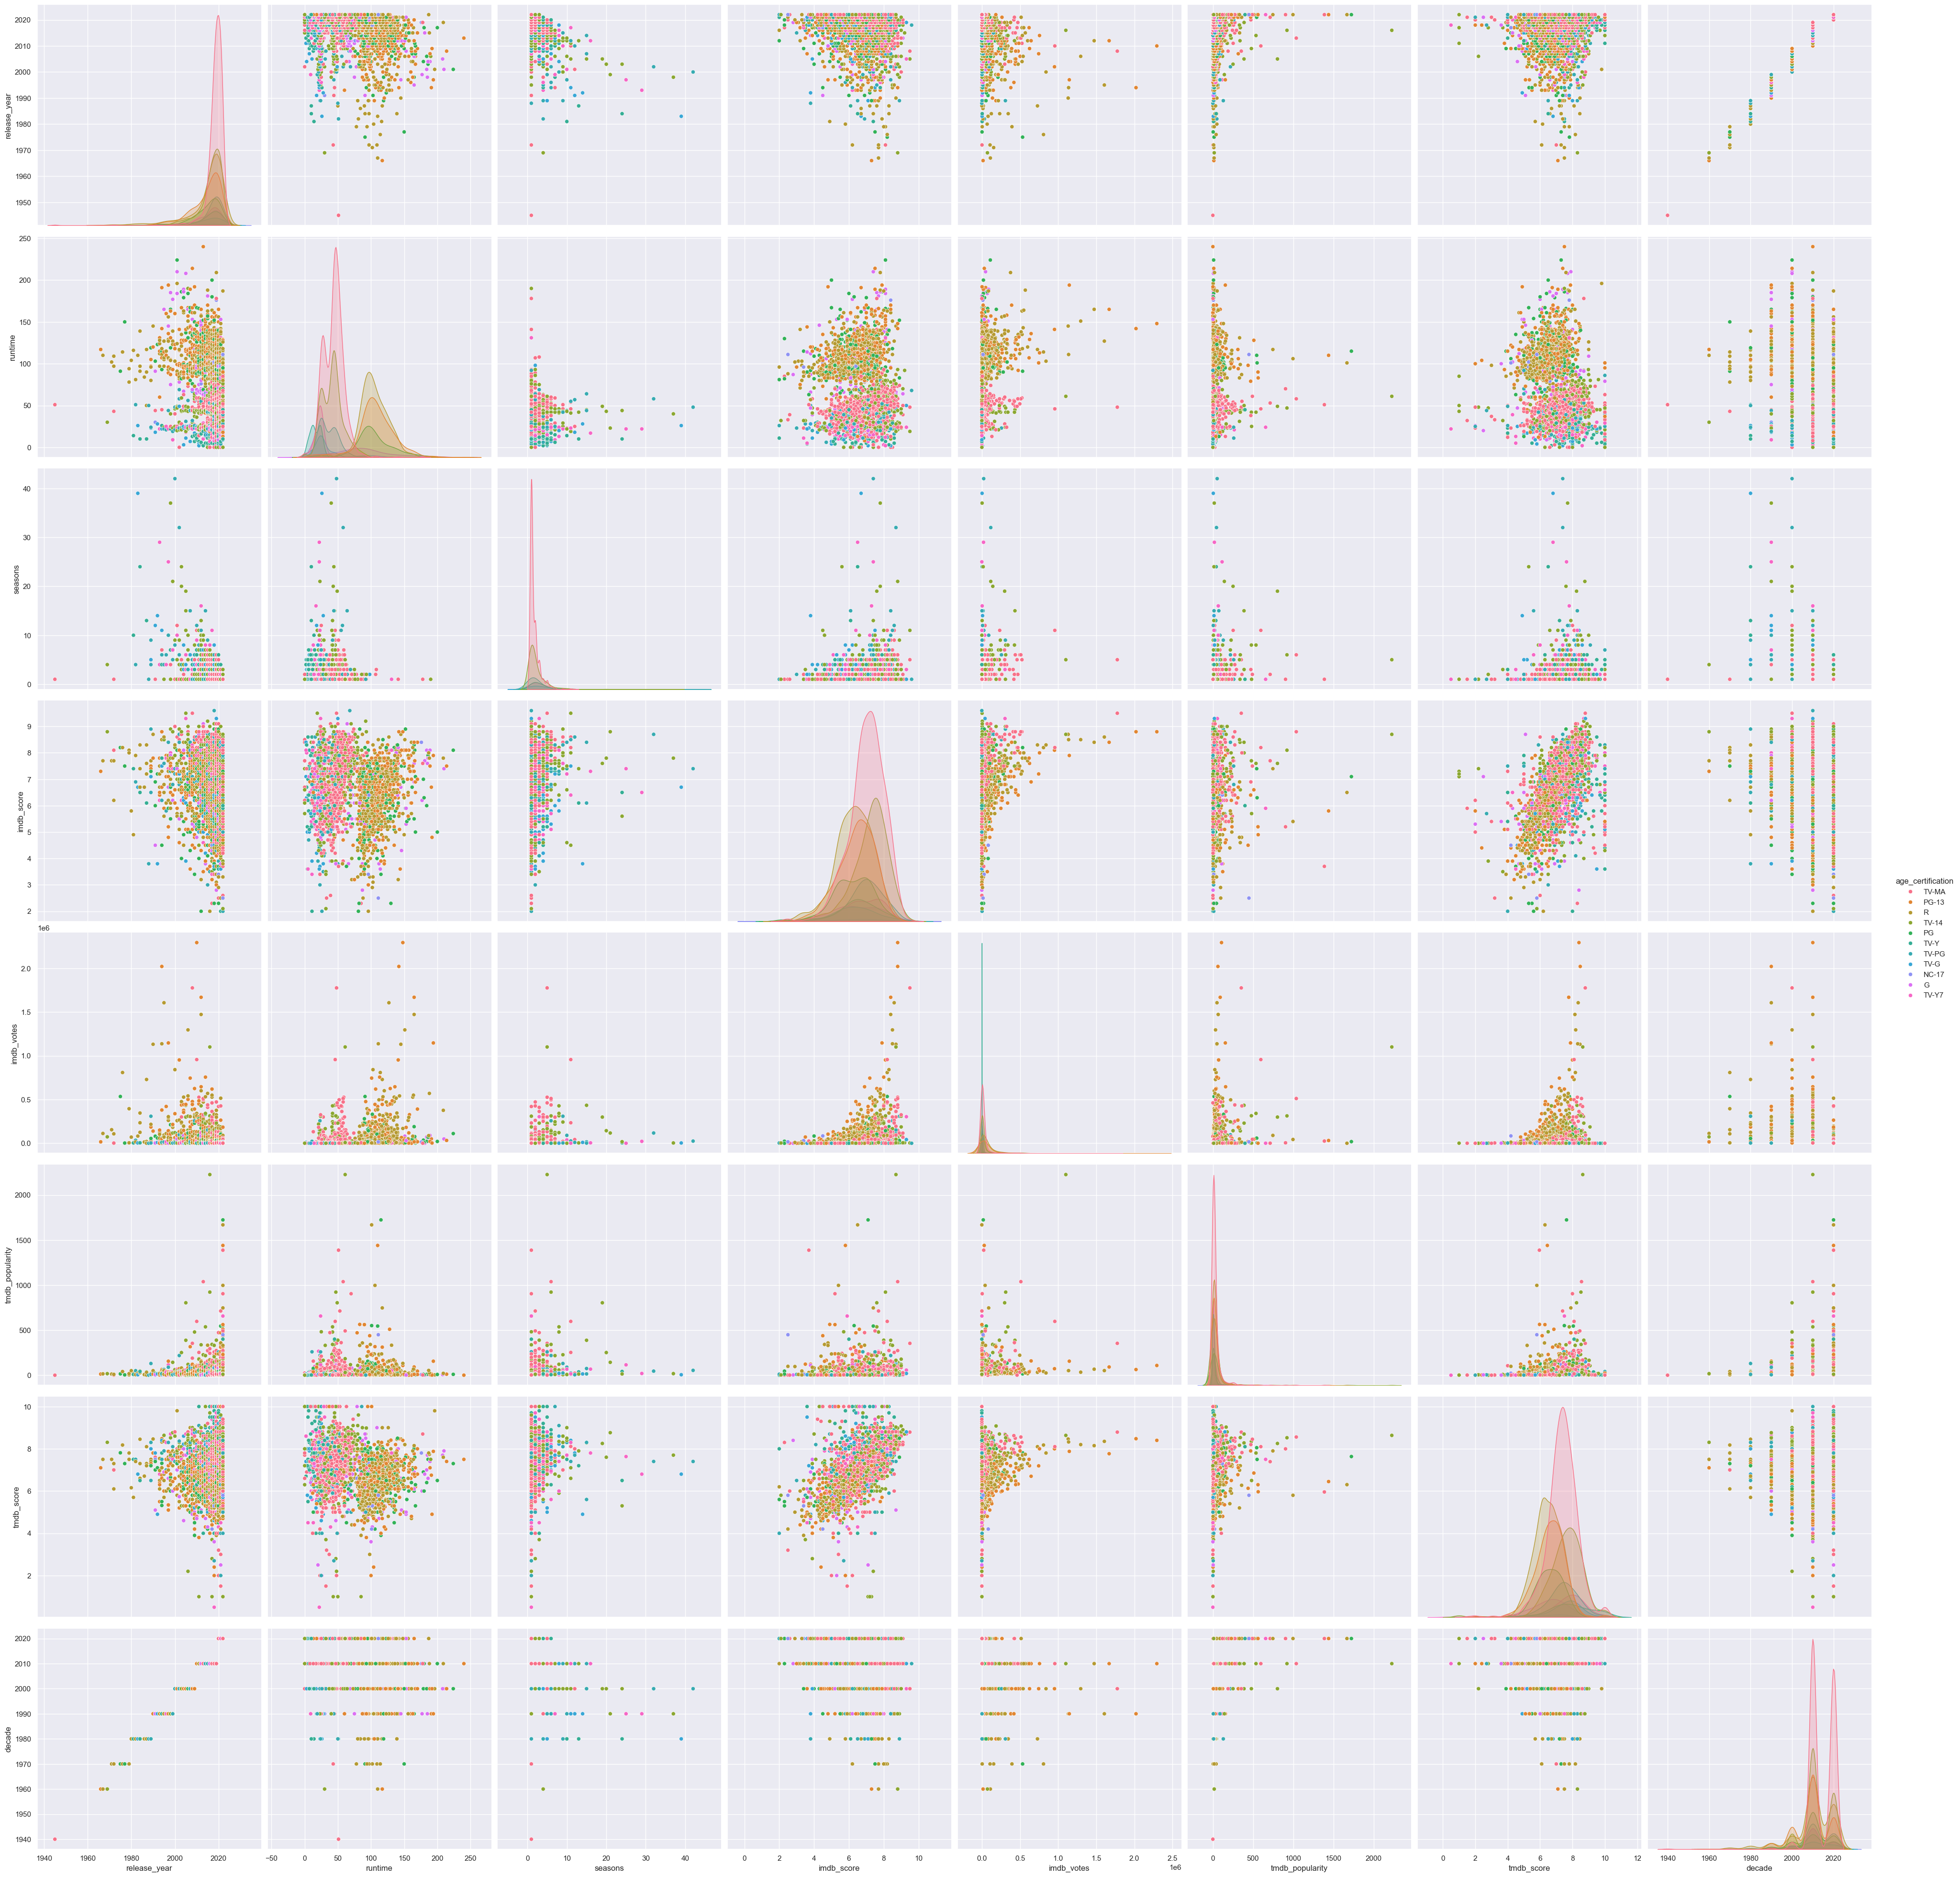

In [58]:
sns.pairplot(merged_df,hue="age_certification",height=5)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [62]:
df1

person_id         id                name                character  \
0           3748    tm84618      Robert De Niro            Travis Bickle   
1          14658    tm84618        Jodie Foster            Iris Steensma   
2           7064    tm84618       Albert Brooks                      Tom   
3           3739    tm84618       Harvey Keitel  Matthew 'Sport' Higgins   
4          48933    tm84618     Cybill Shepherd                    Betsy   
...          ...        ...                 ...                      ...   
77796     736339  tm1059008    Adelaida Buscato                María Paz   
77797     399499  tm1059008  Luz Stella Luengas             Karen Bayona   
77798     373198  tm1059008         Inés Prieto                    Fanny   
77799     378132  tm1059008        Isabel Gaona                   Cacica   
77800    1950416  tm1059008      Julian Gaviria                      NaN   

           role  
0         ACTOR  
1         ACTOR  
2         ACTOR  
3         ACTOR  
4         ACTOR  
...         ...  
77796     ACTOR  
77797     ACTOR  
77798     ACTOR  
77799     ACTOR  
77800  DIRECTOR  

[77801 rows x 5 columns]

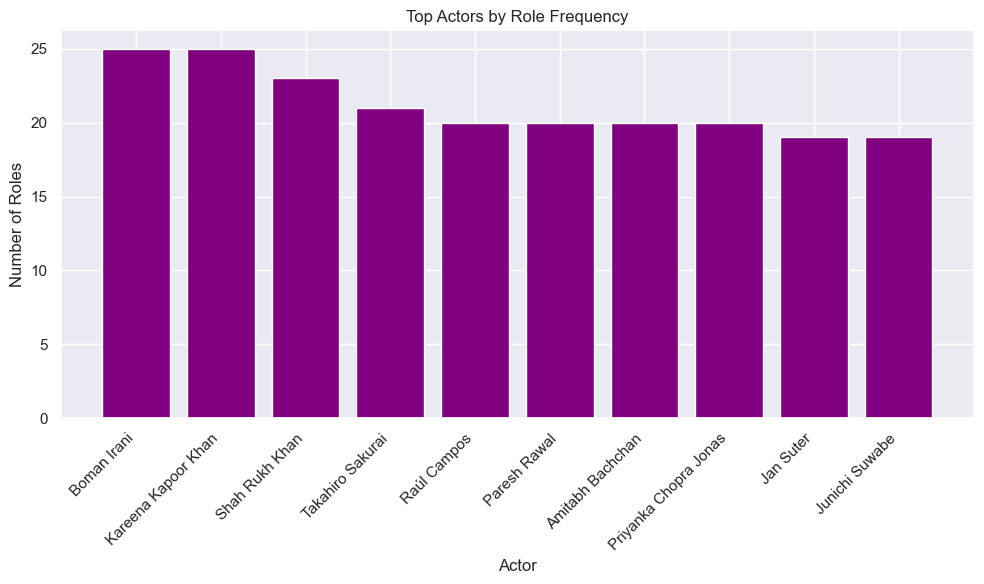

In [64]:
roles=df1.groupby('name')['role'].count().reset_index()
roles=roles.sort_values(by='role',ascending=False)

top_actors=roles.head(10)  # we want to analyse only top 10 actors

plt.figure(figsize=(10, 6))
plt.bar(top_actors['name'], top_actors['role'], color='purple')
plt.xlabel('Actor')
plt.ylabel('Number of Roles')
plt.title('Top Actors by Role Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### By looking at the above data we can infere that Boman Irani has played most number of time by being an actor or director fro a single person 

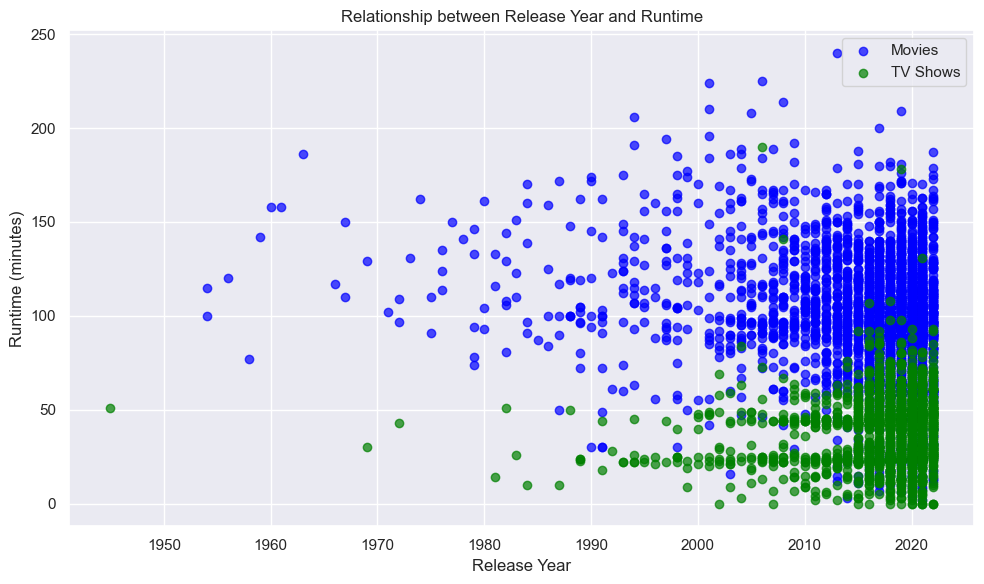

In [103]:
movies = merged_df[merged_df['type'] == 'MOVIE']
tv_shows = merged_df[merged_df['type'] == 'SHOW']

# Plotting release year vs runtime with differentiation
plt.figure(figsize=(10, 6))
plt.scatter(movies['release_year'], movies['runtime'], color='blue', alpha=0.7, label='Movies')
plt.scatter(tv_shows['release_year'], tv_shows['runtime'], color='green', alpha=0.7, label='TV Shows')
plt.title('Relationship between Release Year and Runtime')
plt.xlabel('Release Year')
plt.ylabel('Runtime (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

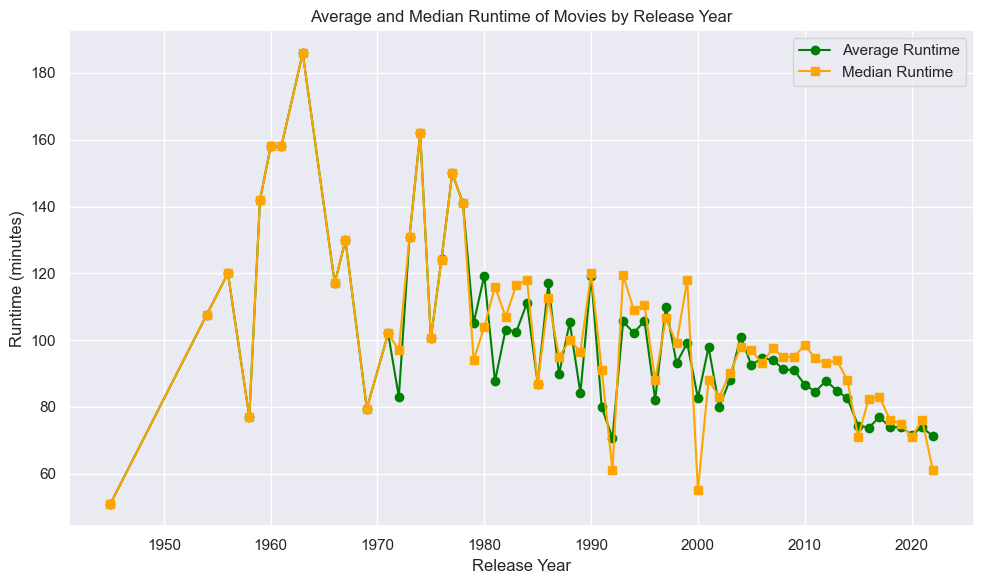

In [121]:
average_runtime = df.groupby('release_year')['runtime'].mean()
median_runtime = df.groupby('release_year')['runtime'].median()

# Plotting release year vs average and median runtime
plt.figure(figsize=(10, 6))
plt.plot(average_runtime.index, average_runtime.values, marker='o', linestyle='-', color='green', label='Average Runtime')
plt.plot(median_runtime.index, median_runtime.values, marker='s', linestyle='-', color='orange', label='Median Runtime')
plt.title('Average and Median Runtime of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Runtime (minutes)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()